# Deep Learning and Computer Vision 

**In this tutorial, we provide you a brief introduction to classify images using ANN classifier.**

**Classification** is a technique where we categorize data into a given number of classes. The main goal of a classification problem is to identify the category/class to which a new data will fall under.

Few of the terminologies encountered in machine learning – classification: 

a. *Classifier*: An algorithm that maps the input data to a specific category.

b. *Classification model*: A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

c. *Feature*: A feature is an individual measurable property of a phenomenon being observed.

d. *Binary Classification*: Classification task with two possible outcomes. Eg: Gender classification (Male / Female)
Multi-class classification: Classification with more than two classes. In multi class classification each sample is assigned to one and only one target label. Eg: An animal can be cat or dog but not both at the same time

e. *Multi-label classification*: Classification task where each sample is mapped to a set of target labels (more than one class). Eg: A news article can be about sports, a person, and location at the same time.


**The following are the steps involved in building a classification model:**

1. Initialize the classifier to be used.
2. Train the classifier: All classifiers in scikit-learn uses a fit(X, y) method to fit the model(training) for the given train data X and train label y.
3. Predict the target: Given an unlabeled observation X, the predict(X) returns the predicted label y.
4. Evaluate the classifier model

**Import the necessary packages**

In [ ]:
import os
import numpy as np
import cv2

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras import applications
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


**Following function reads images from the folder**

In [ ]:
def flatten_images(folder):
    images=[]
    for filename in os.listdir(folder):
        img=plt.imread(folder+filename)
        img = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)# 64*64*3=12288
#         print(img.shape)
        img=np.array(img)
        img=img.flatten()
        images.append(img)
    return(images)

In [ ]:
rock=flatten_images('rps-cv-images/rock/') # calling the function above to compute rock hand gesture features
rock=np.array(rock) # converting list into numpy array
rock.shape  # print shape of array
# In the output output : rows count shows the number of images and columns count is the number of features

(724, 12288)

In [ ]:
# same as above but for paper data
paper=flatten_images('rps-cv-images/paper/')
paper=np.array(paper)
paper.shape

(710, 12288)

In [ ]:
# same as above but for scissors data
scissors=flatten_images('rps-cv-images/scissors/')
scissors=np.array(scissors)
scissors.shape

(748, 12288)

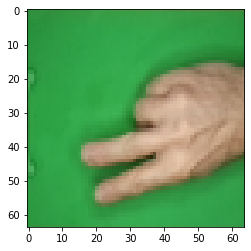

In [ ]:
plt.imshow(scissors[0].reshape(64,64,3))

**Create labels for rock, paper and scissors class vectors** 

In [ ]:
rock_labels=np.ones((len(rock),1)) # np.ones creates an array of ones (where 1 is the label) with only one column and number of rows same as number of rock images 
paper_labels=np.zeros((len(paper),1))# np.zeros creates an array of ones (where 1 is the label) with only one column and number of rows same as number of paper images
scissors_labels=np.full((len(scissors),1),2)# label as 2 for scissors

**Create feature vector and corresponding label vector containing all the three classes**

In [ ]:
labels=np.concatenate((rock_labels,paper_labels,scissors_labels),axis=0)
features=np.concatenate((rock,paper,scissors),axis=0)

**Split the features and labels into test and train sets**

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3)

**ANN classifier will be used for classification** 

In [ ]:
# Build the model.
model = Sequential([
  Dense(1024, activation='relu', input_shape=(12288,)),
  Dense(128, activation='relu'),
  Dense(32, activation='relu'),  
  Dense(3, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              12583936  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 12,719,363
Trainable params: 12,719,363
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model.
import tensorflow as tf
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

# Train the model.
history=model.fit(
  X_train,
  to_categorical(y_train),
  epochs=50,
  batch_size=32,
  validation_data=(X_test, to_categorical(y_test))
)

Train on 1527 samples, validate on 655 samples
Epoch 1/50
1527/1527 [==============================] - 9s 6ms/step - loss: 1.8746 - accuracy: 0.4244 - auc: 0.5352 - precision: 0.3611 - recall: 0.2929 - val_loss: 0.9395 - val_accuracy: 0.4855 - val_auc: 0.6156 - val_precision: 0.4438 - val_recall: 0.3480
Epoch 2/50
1527/1527 [==============================] - 9s 6ms/step - loss: 0.8988 - accuracy: 0.5796 - auc: 0.6625 - precision: 0.4914 - recall: 0.3775 - val_loss: 0.7971 - val_accuracy: 0.6305 - val_auc: 0.6998 - val_precision: 0.5446 - val_recall: 0.4015
Epoch 3/50
1527/1527 [==============================] - 10s 6ms/step - loss: 0.7529 - accuracy: 0.7053 - auc: 0.7284 - precision: 0.5831 - recall: 0.4251 - val_loss: 0.7118 - val_accuracy: 0.6244 - val_auc: 0.7530 - val_precision: 0.6146 - val_recall: 0.4442
Epoch 4/50
1527/1527 [==============================] - 10s 6ms/step - loss: 0.6588 - accuracy: 0.7525 - auc: 0.7729 - precision: 0.6393 - recall: 0.4643 - val_loss: 0.6129 - val

1527/1527 [==============================] - 9s 6ms/step - loss: 0.0681 - accuracy: 0.9758 - auc: 0.9631 - precision: 0.8843 - recall: 0.8303 - val_loss: 0.2036 - val_accuracy: 0.9435 - val_auc: 0.9639 - val_precision: 0.8858 - val_recall: 0.8324
Epoch 33/50
1527/1527 [==============================] - 10s 6ms/step - loss: 0.0583 - accuracy: 0.9777 - auc: 0.9646 - precision: 0.8872 - recall: 0.8344 - val_loss: 0.2130 - val_accuracy: 0.9405 - val_auc: 0.9654 - val_precision: 0.8885 - val_recall: 0.8363
Epoch 34/50
1527/1527 [==============================] - 9s 6ms/step - loss: 0.0707 - accuracy: 0.9764 - auc: 0.9660 - precision: 0.8898 - recall: 0.8382 - val_loss: 0.2256 - val_accuracy: 0.9435 - val_auc: 0.9667 - val_precision: 0.8911 - val_recall: 0.8400
Epoch 35/50
1527/1527 [==============================] - 9s 6ms/step - loss: 0.0463 - accuracy: 0.9817 - auc: 0.9674 - precision: 0.8924 - recall: 0.8419 - val_loss: 0.2394 - val_accuracy: 0.9481 - val_auc: 0.9680 - val_precision: 0.8

In [ ]:
results=model.evaluate(X_test,to_categorical(y_test),batch_size=128)
print('test loss', results[0])
print('test acc', results[1])
print('test auc', results[2])
print('test precision', results[3])
print('test recall', results[4])

655/655 [==============================] - 1s 864us/step
test loss 0.3050295408217962
test acc 0.9267175793647766
test auc 0.9791193604469299
test precision 0.9173750281333923
test recall 0.8797487616539001


dict_keys(['val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall', 'loss', 'accuracy', 'auc', 'precision', 'recall'])


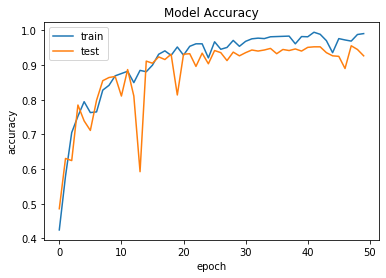

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Test each image inside test_images folder placed inside data folder and find its corresponding class**

In [ ]:
test_folder='test_rps/'
results=[]
for filename in os.listdir(test_folder):
    temp=[]
    img=plt.imread(test_folder+filename)
    img=np.array(img)
    img = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
    inp=np.reshape(img,(1,12288))
    prediction_result=model.predict(inp)
    x=np.argmax(prediction_result)
    if(x==0):
        pred_class_name='paper'
    elif(x==1):
        pred_class_name='rock'
    else:
        pred_class_name='scissors'
    temp.append(filename)
    temp.append(pred_class_name)
    temp.append(prediction_result[0][x]*100)
    results.append(temp)

In [ ]:
results=np.array(results)
print(results)

[['paper.png' 'paper' '99.99982118606567']
 ['paper2.png' 'paper' '99.9925971031189']
 ['rock.png' 'rock' '99.94458556175232']
 ['rock2.png' 'rock' '99.99935626983643']
 ['scissors.png' 'scissors' '99.94001388549805']
 ['scissors2.png' 'scissors' '99.9987244606018']]


References:

https://scikit-learn.org/stable/
https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/